In [1]:
import numpy as np

In [2]:
alto=50
ancho=200
mi_arreglo=np.zeros((alto, ancho))
print('las dimensiones del arreglo son', mi_arreglo)

las dimensiones del arreglo son [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


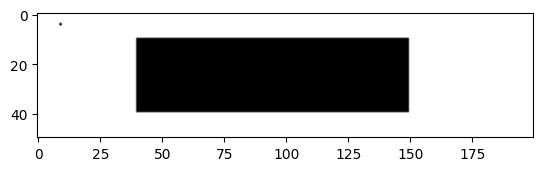

In [105]:
import matplotlib.pyplot as plt
array=np.zeros((alto,ancho))
array[4,9]=1
array[10:40, 40:150]=1
#array[18:33, 50:140]= 0.5
plt.imshow (-array, cmap='gray')


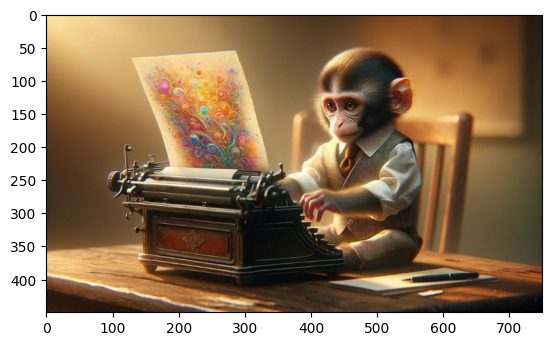

In [15]:
arch='imagen.jpg'
img_tmp=plt.imread(arch)
plt.imshow(img_tmp)

In [16]:
type(img_tmp)

numpy.ndarray

In [17]:
img_tmp.shape

(450, 750, 3)

In [18]:
img_tmp[205,600]

array([103,  61,  21], dtype=uint8)

In [19]:
img_tmp.max(), img_tmp.min()

(255, 0)

(450, 750)


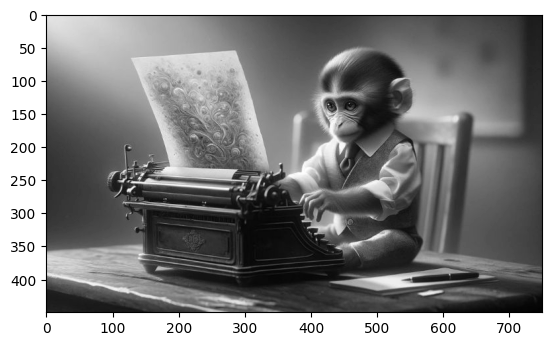

In [39]:
import cv2
arch='imagen.jpg'
img_tmp2=cv2.imread(arch,0)
print(img_tmp.shape)
plt.imshow(img_tmp, cmap='gray')


In [41]:
import keras
from keras.layers import Input,Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten


In [74]:
h,w=img_tmp2.shape
print(h,w)
input_img=Input(shape=(h,w,1))
type(input_img)

450 750


keras.src.backend.common.keras_tensor.KerasTensor

In [48]:
x=Conv2D(1,(1,1), activation='relu', padding='same')(input_img)

In [59]:
img_resized=np.reshape(img_tmp2,(1,450,750,1))
img_resized.shape

(1, 450, 750, 1)

In [60]:
from keras.models import Model
modelo1=Model(input_img,x)
modelo1.set_weights([np.array([[[[100]]]]).astype(np.float32), np.array([-50.0]).astype(np.float32)])
img1=modelo1.predict(img_resized)
img1.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


(1, 450, 750, 1)

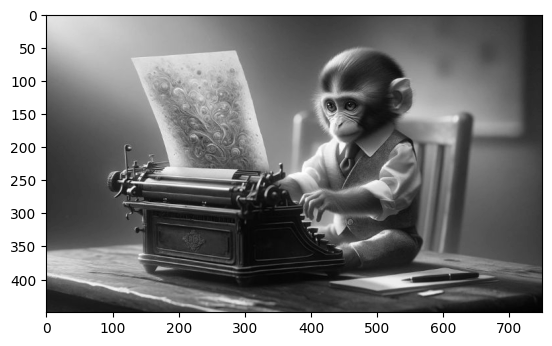

In [62]:
img_final=np.reshape(img1,(450,750))
plt.imshow(img_final, cmap='gray')

# **MAX POOLLING**

In [64]:
x=Conv2D(1,(1,1), activation='relu', padding='same')(input_img)
x=MaxPooling2D((2,2), padding='same')(x)
modelo2=Model(input_img,x)
modelo2.set_weights([np.array([[[[100]]]]).astype(np.float32), np.array([-50.0]).astype(np.float32)])
img2=modelo2.predict(img_resized)
img2.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


(1, 225, 375, 1)

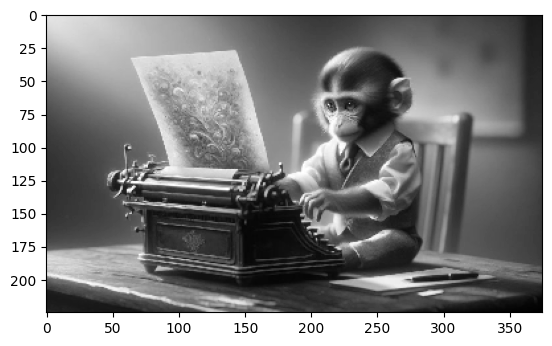

In [66]:
img_final2=np.reshape(img2,(225,375))
plt.imshow(img_final2, cmap='gray')

In [108]:
from IPython.display import Image
import numpy as np
import time
import os
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
import glob
import cv2
import json
from matplotlib import pyplot as plt
import keras

def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]

  return salida

In [109]:
h,w=array.shape
print(h,w)
input_img2=Input(shape=(h,w,1))

x=Conv2D(2,(2,2), activation='linear', padding='same')(input_img2)
modelo3=Model(input_img2,x)

filtro1=[
     [1,-1],
     [1,-1]]

filtro2=[
     [1,1],
     [-1,-1]]

filtros=reformar_filtros([filtro1,filtro2])

modelo3.set_weights([filtros, np.array([0,0],dtype=np.float32)])


50 200
arreglo 2 2 2 (2, 2, 1, 2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


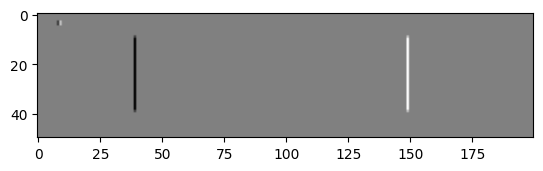

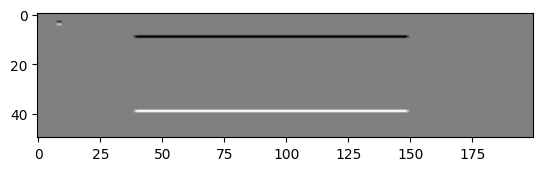

In [110]:
reshape=np.reshape(array,(1,50,200,1))
img4=modelo3.predict(reshape)
#img4=modelo3.predict(array['grises'])
imagen1_conv1a=np.reshape(img4[0,:,:,0],(50,200))
imagen2_conv2a=np.reshape(img4[0,:,:,1],(50,200))

plt.imshow(imagen1_conv1a, cmap='gray')
plt.show()
plt.imshow(imagen2_conv2a, cmap='gray')
plt.show()

In [115]:
h,w=array.shape
print(h,w)
input_img2=Input(shape=(h,w,1))

x=Conv2D(3,(3,3), activation='linear', padding='same')(input_img2)
modelo4=Model(input_img2,x)

filtro1=[
     [1,0,-1],
     [1,0,-1],
     [1,0,-1]]

filtro2=[
     [1,1,1],
     [0,0,0],
     [-1,-1,-1]]


filtro3=[
      [1,2,1],
     [2,-12,2],
     [1,2,1]]


filtros=reformar_filtros([filtro1,filtro2,filtro3])

modelo4.set_weights([filtros, np.array([0,0,0],dtype=np.float32)])




50 200
arreglo 3 3 3 (3, 3, 1, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


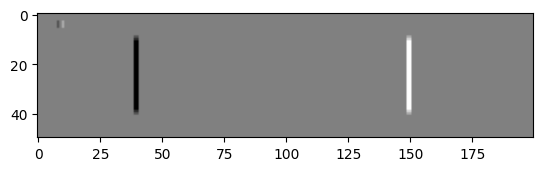

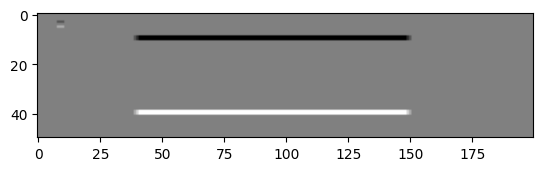

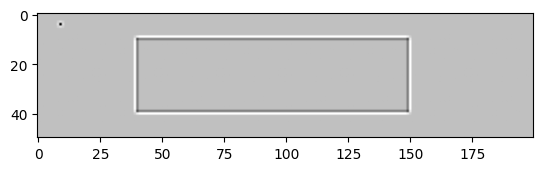

In [118]:
reshape=np.reshape(array,(1,50,200,1))
img5=modelo4.predict(reshape)
#img4=modelo3.predict(array['grises'])
imagen1_conv1b=np.reshape(img5[0,:,:,0],(50,200))
imagen2_conv2c=np.reshape(img5[0,:,:,1],(50,200))
imagen3_conv3d=np.reshape(img5[0,:,:,2],(50,200))


plt.imshow(imagen1_conv1b, cmap='gray')
plt.show()
plt.imshow(imagen2_conv2c, cmap='gray')
plt.show()
plt.imshow(imagen3_conv3d, cmap='gray')
plt.show()